In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
#reading databases
testing = pd.read_csv('Testing.csv')
training = pd.read_csv('Training.csv')


In [4]:
bs = training.loc[5]
print (training.isnull().sum())
bs.isnull().sum()     #an empty column was discovered with a name unnamed and null values


itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64


1

In [5]:
df = pd.concat([training, testing], ignore_index=True)
df = df.drop(['Unnamed: 133'], axis=1)
df.isnull().sum().sum()        #checking if there is  remaining null values



0

In [45]:
mean_values = df.groupby(['prognosis']).mean()
q = mean_values[mean_values > 0].mean().mean()  
w = mean_values[mean_values > 0].median().median()  
print(q,w)

0.9393911426508258 0.9504132231404959


In [40]:
df_values = mean_values.sum()/41*100
df_values = df_values.sort_values()
min_value = mean_values[mean_values > 0].min().min()
max_value = mean_values.max().max()
value_to_count = 1
#count = df_values.eq(value_to_count).sum().sum()
count_np = np.sum(df_values.values == 1.000000)
print (min_value, max_value, count) #minimum non zero value and maximum value 



0.00819672131147541 1.0 0


C:\Users\obadz\AppData\Local\Temp\ipykernel_22020\1739938443.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


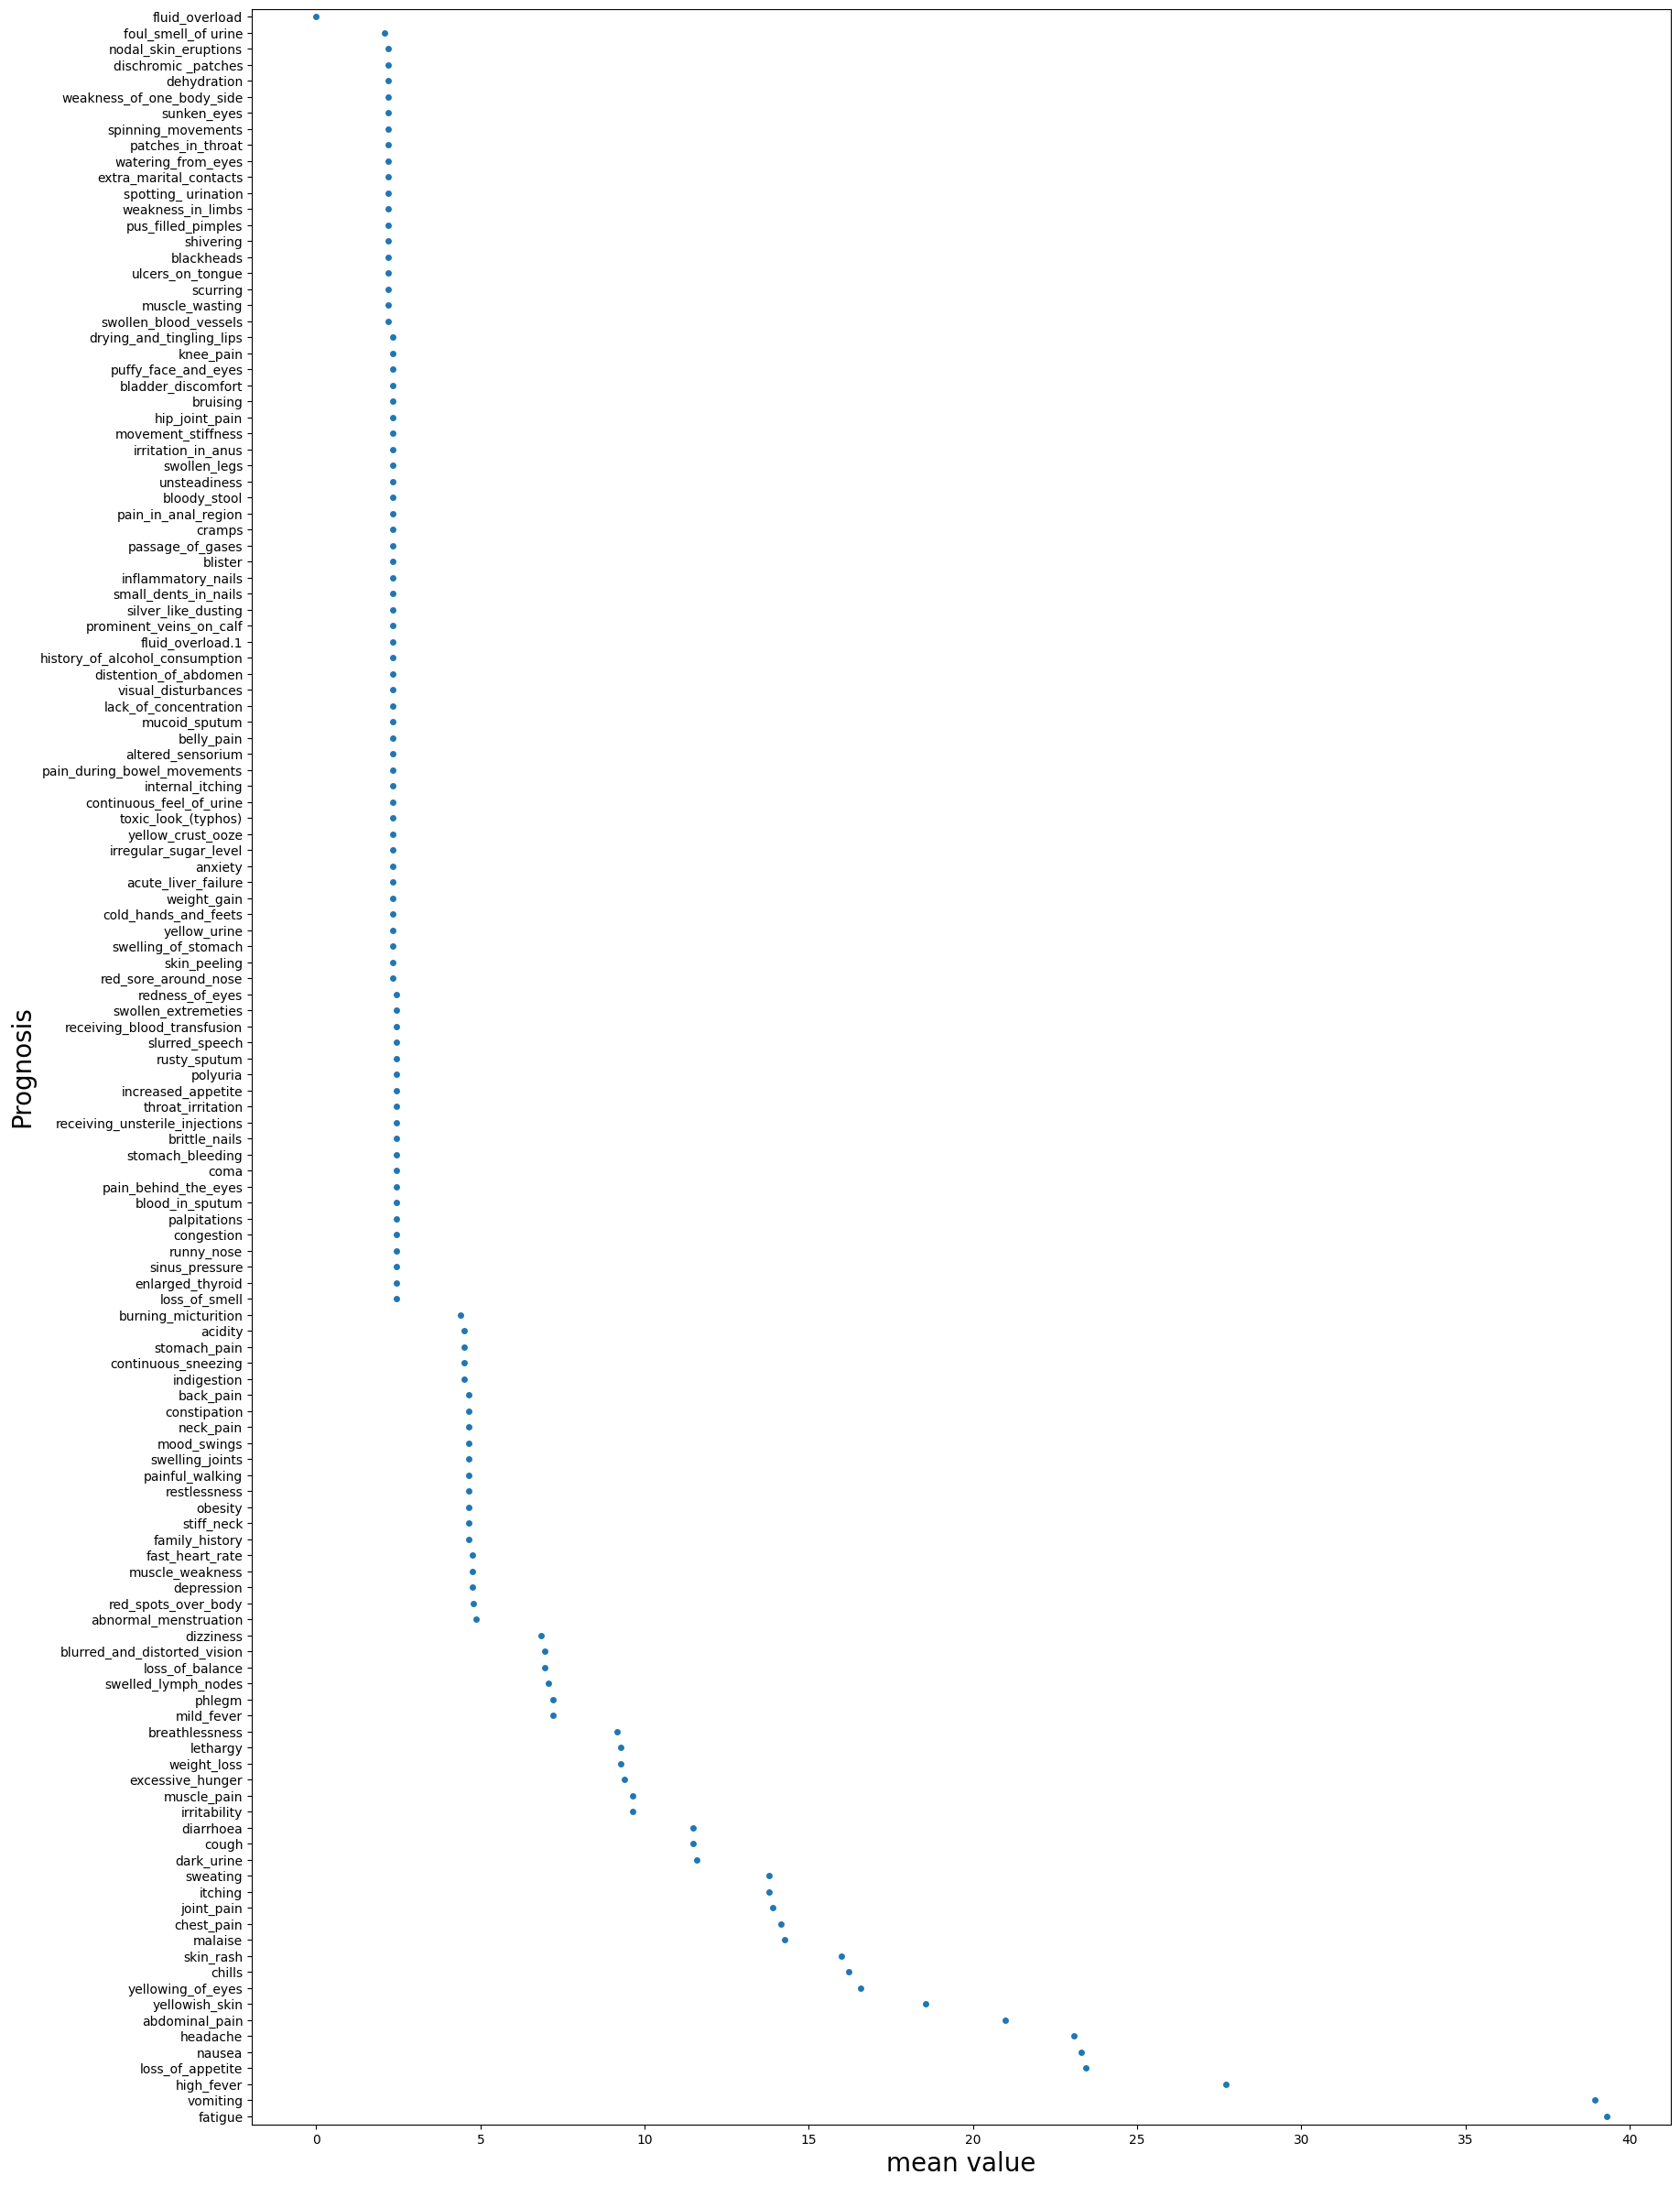

In [41]:
fig = plt.figure(figsize=(20,30))
#gs = GridSpec(1,2)
sns.swarmplot(y=df_values.index, x=df_values)
plt.ylabel('Prognosis', fontsize=20)
plt.xlabel('mean value', fontsize=20)
fig.show()

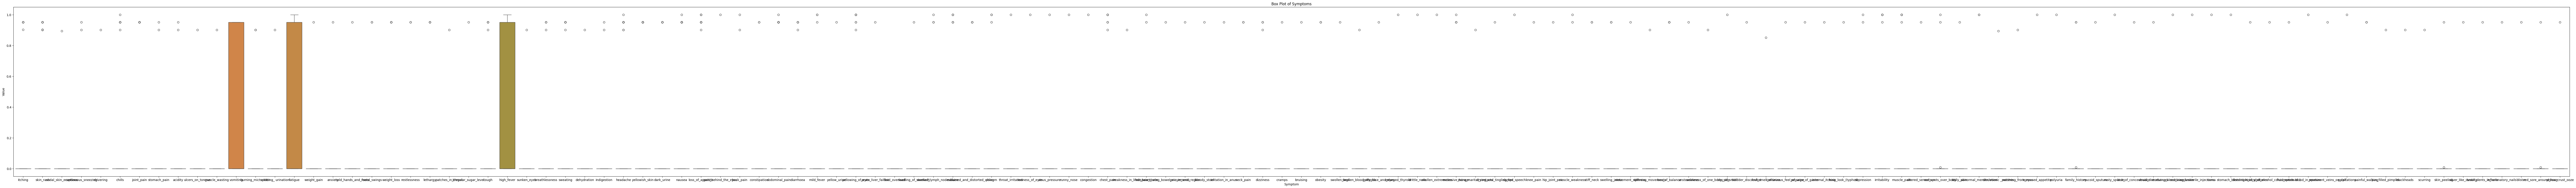

In [10]:
plt.figure(figsize=(150, 10))
sns.boxplot(data=mean_values)
plt.title('Box Plot of Symptoms')
plt.ylabel('Value')
plt.xlabel('Symptom')
plt.show()

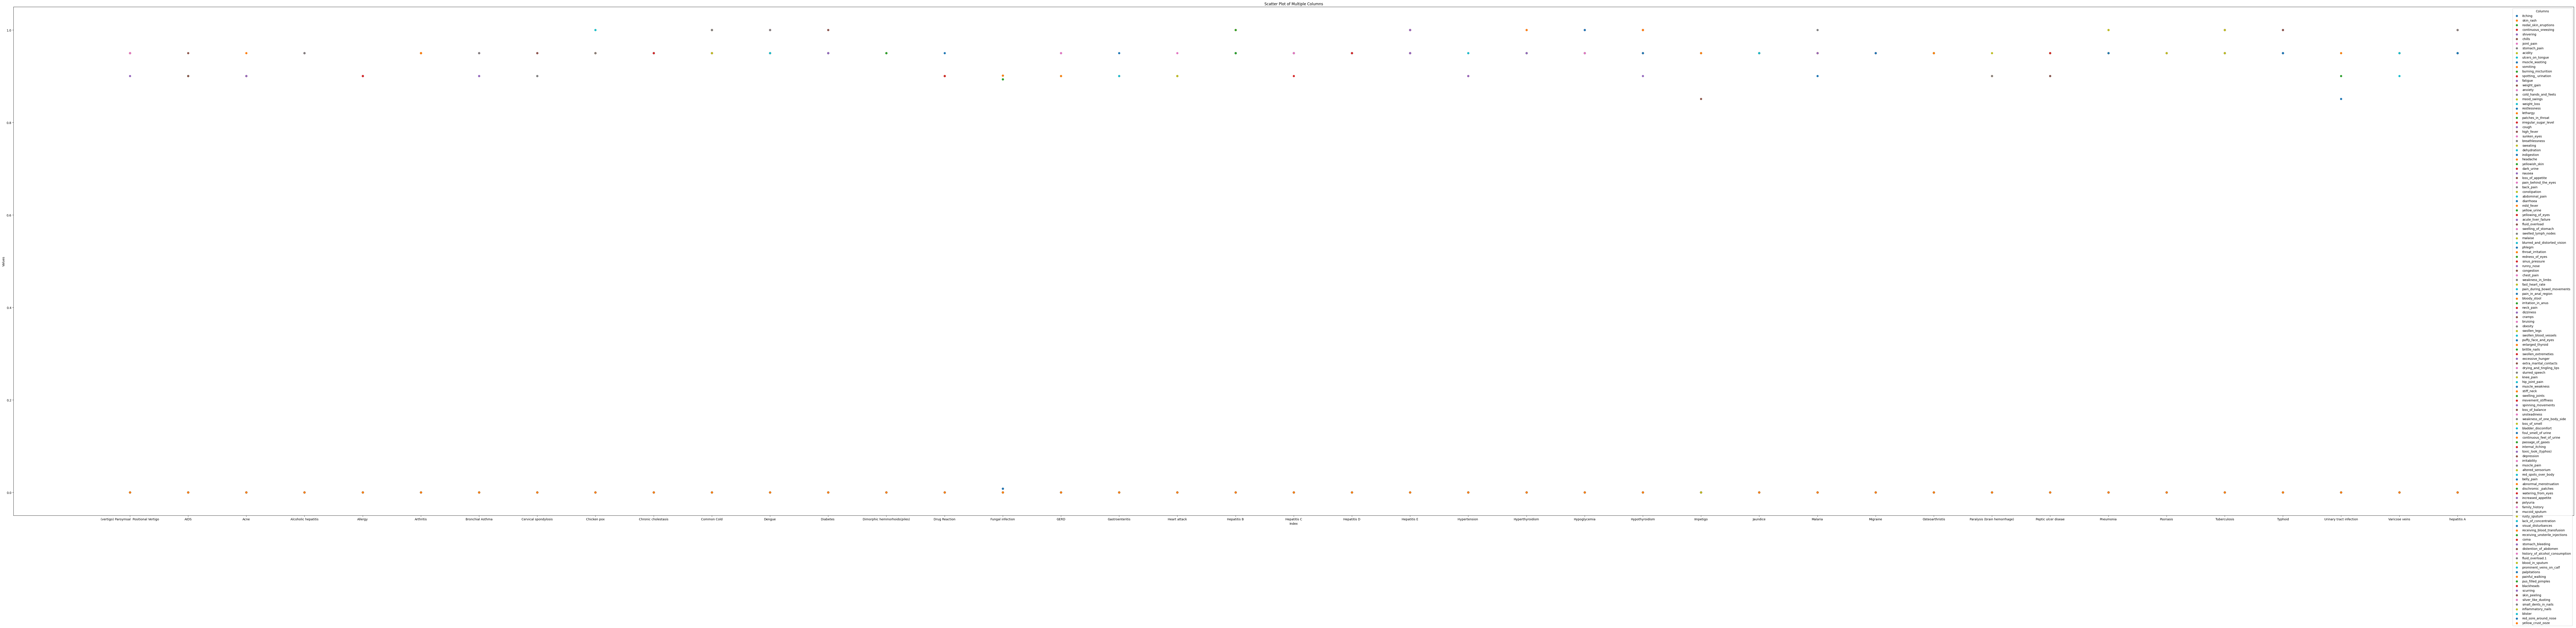

In [12]:
plt.figure(figsize=(150, 30))
for column in mean_values.columns:
    plt.scatter(mean_values.index, mean_values[column], label=column)

plt.title('Scatter Plot of Multiple Columns')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(title='Columns')
plt.show()